Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns

Data collection and processing

In [2]:
calories = pd.read_csv('/content/calories.csv')

In [3]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [4]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [5]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [6]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [8]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
calories_data.drop('User_ID', axis=1, inplace=True)

In [10]:
# checking for missing values
calories_data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [11]:
# get some statistical measures about the data
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [12]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

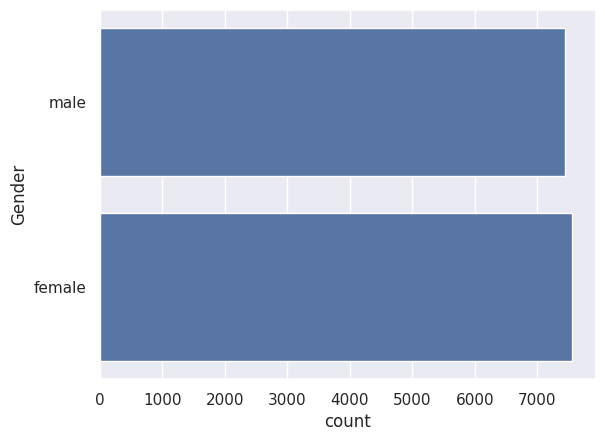

In [13]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

/tmp/ipython-input-65959470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

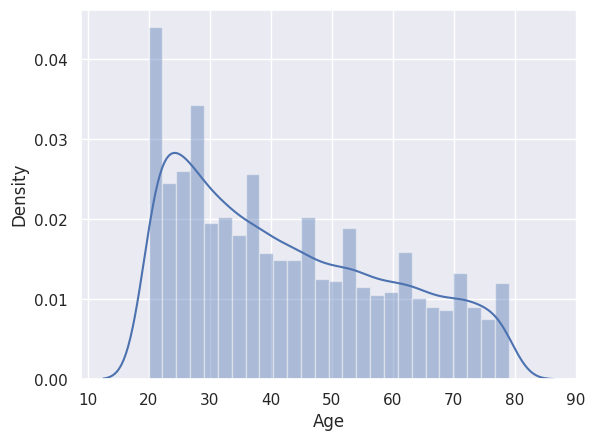

In [14]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

/tmp/ipython-input-784960979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

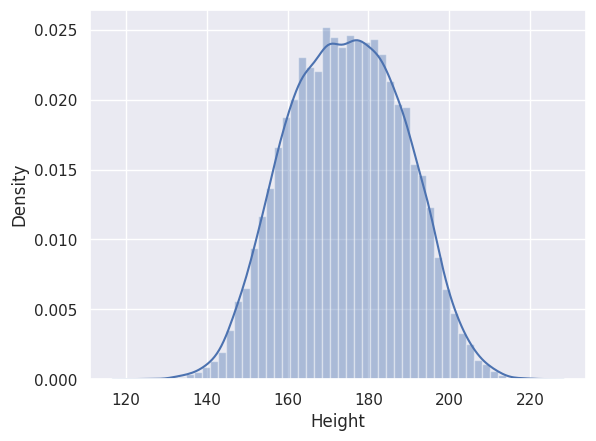

In [15]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

/tmp/ipython-input-1532561181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

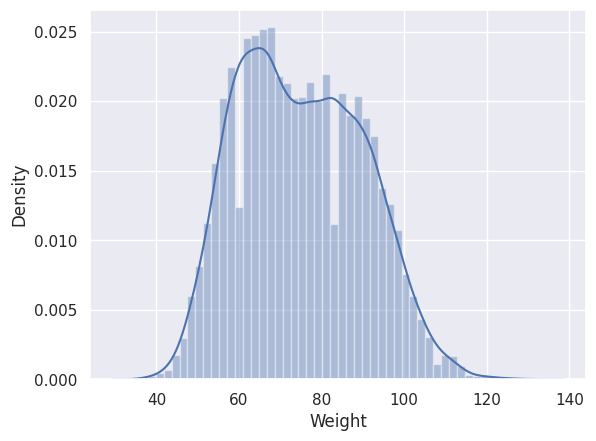

In [16]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1.Positive Correlation

2.Negative Correlation

In [17]:

# Converting the text data to numerical values
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)



/tmp/ipython-input-3098330917.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [18]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
correlation = calories_data.corr()

<Axes: >

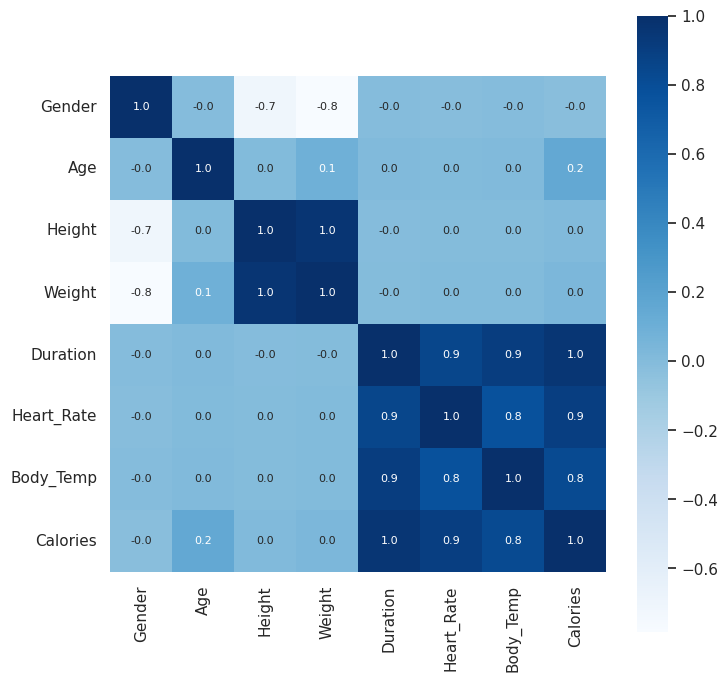

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [21]:
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']

In [22]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [23]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data



In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

Train Decision Tree Regression

In [26]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_preds = dt_model.predict(X_test)

Train XGBoost Regression

In [27]:
# loading the model
model = XGBRegressor()
# training the model with X_train
model.fit(X_train, Y_train)
Xgboost_preds = model.predict(X_test)

Train Linear Regression

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_preds = lr_model.predict(X_test)

Prediction on Test Data

In [29]:
print(Xgboost_preds)
print(lr_preds)
print(dt_preds)


[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]
[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]
[129. 220.  35. ... 154.  25.  83.]


Evaluation Function

In [30]:
def evaluate_model(name, Y_true, Y_pred):
    print(f"🔍 {name} Evaluation:")
    print(f"➡ MAE: {mean_absolute_error(Y_true, Y_pred):.2f}")
    print(f"➡ MSE: {mean_squared_error(Y_true, Y_pred) :.2f}")
    print(f"➡ R2 Score: {r2_score(Y_true, Y_pred):.2f}")
    print("-" * 30)

In [31]:
evaluate_model("Linear Regression", Y_test, lr_preds)
evaluate_model("XGBoost Regression", Y_test, Xgboost_preds)
evaluate_model("Decision Tree Regression", Y_test, dt_preds)

🔍 Linear Regression Evaluation:
➡ MAE: 8.39
➡ MSE: 130.09
➡ R2 Score: 0.97
------------------------------
🔍 XGBoost Regression Evaluation:
➡ MAE: 1.48
➡ MSE: 4.71
➡ R2 Score: 1.00
------------------------------
🔍 Decision Tree Regression Evaluation:
➡ MAE: 3.40
➡ MSE: 28.28
➡ R2 Score: 0.99
------------------------------


Plot comparison

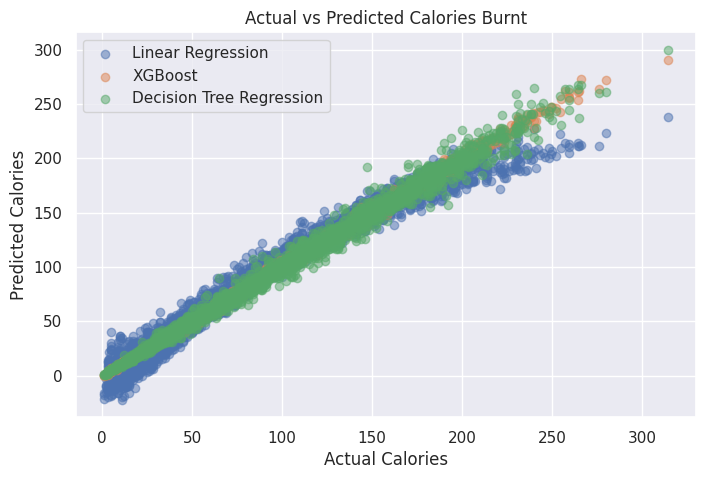

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(Y_test, lr_preds, label='Linear Regression', alpha=0.5)
plt.scatter(Y_test, Xgboost_preds, label='XGBoost', alpha=0.5)
plt.scatter(Y_test, dt_preds, label='Decision Tree Regression', alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories Burnt")
plt.legend()
plt.show()

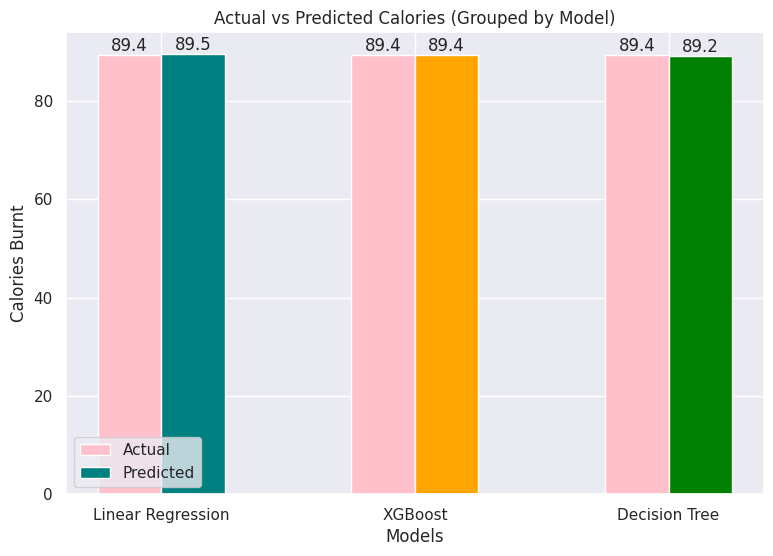

In [33]:

# Calculate mean of actual and predicted values
actual_mean = np.mean(Y_test)
lr_mean = np.mean(lr_preds)
xgb_mean = np.mean(Xgboost_preds)
dt_mean = np.mean(dt_preds)

# Models and values
models = ["Linear Regression", "XGBoost", "Decision Tree"]
actual_values = [actual_mean] * len(models)  # same actual mean for all models
predicted_values = [lr_mean, xgb_mean, dt_mean]

# Bar positions
x = np.arange(len(models))
width = 0.25

# Plot grouped bar chart
plt.figure(figsize=(9,6))
bars1 = plt.bar(x - width/2, actual_values, width, label='Actual', color='pink')
bars2 = plt.bar(x + width/2, predicted_values, width, label='Predicted', color=['teal','orange','green'])

# Add values on top of bars
for bar in bars1 + bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom')

# Labels
plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Calories Burnt")
plt.title("Actual vs Predicted Calories (Grouped by Model)")
plt.legend()
plt.show()


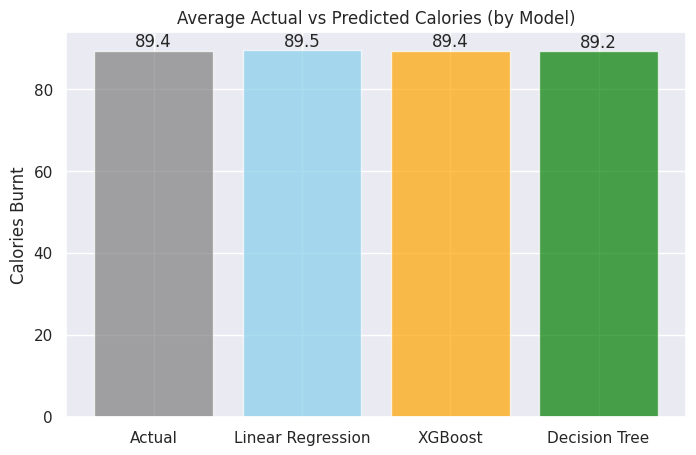

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean of actual and predicted values
actual_mean = np.mean(Y_test)
lr_mean = np.mean(lr_preds)
xgb_mean = np.mean(Xgboost_preds)
dt_mean = np.mean(dt_preds)

# Bar labels and values
models = ["Actual", "Linear Regression", "XGBoost", "Decision Tree"]
values = [actual_mean, lr_mean, xgb_mean, dt_mean]

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, values, color=['gray','skyblue','orange','green'], alpha=0.7)

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom')

plt.ylabel("Calories Burnt")
plt.title("Average Actual vs Predicted Calories (by Model)")
plt.show()


                        MAE         MSE        R2
Linear Regression  8.385188  130.087074  0.966879
XGBoost            1.483368    4.710710  0.998801
Decision Tree      3.396333   28.281000  0.992799


<Figure size 1000x600 with 0 Axes>

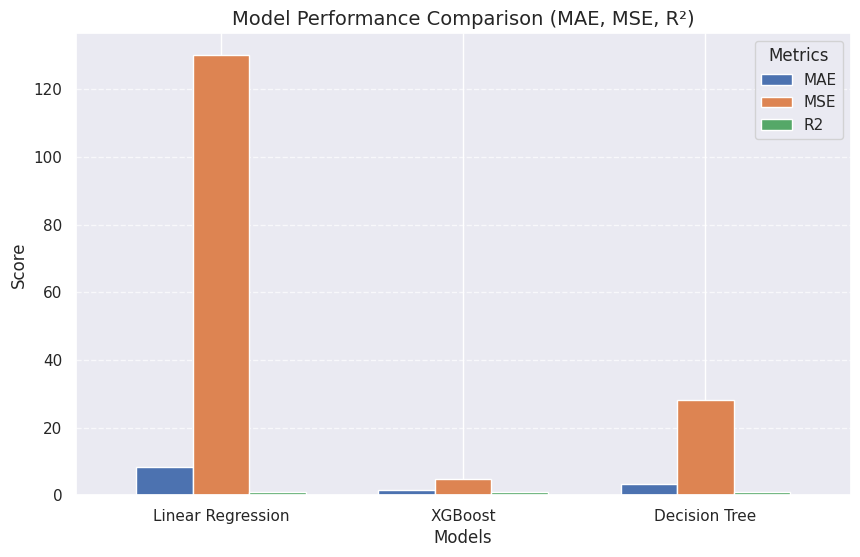

In [35]:
# 📊 Collect metrics for all models
metrics_results = {
    "Linear Regression": {
        "MAE": mean_absolute_error(Y_test, lr_preds),
        "MSE": mean_squared_error(Y_test, lr_preds),
        "R2": r2_score(Y_test, lr_preds)
    },
    "XGBoost": {
        "MAE": mean_absolute_error(Y_test, Xgboost_preds),
        "MSE": mean_squared_error(Y_test, Xgboost_preds),
        "R2": r2_score(Y_test, Xgboost_preds)
    },
    "Decision Tree": {
        "MAE": mean_absolute_error(Y_test, dt_preds),
        "MSE": mean_squared_error(Y_test, dt_preds),
        "R2": r2_score(Y_test, dt_preds)
    }
}

# Convert to DataFrame for easy plotting
results_df = pd.DataFrame(metrics_results).T  # Models as rows
print(results_df)

# 🎨 Plot grouped bar chart for metrics
plt.figure(figsize=(10,6))
results_df.plot(kind="bar", figsize=(10,6), width=0.7)

plt.title("Model Performance Comparison (MAE, MSE, R²)", fontsize=14)
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


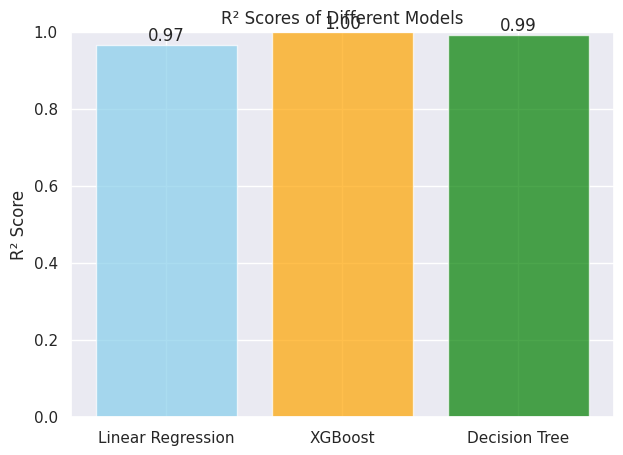

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate R² scores
lr_r2 = r2_score(Y_test, lr_preds)
xgb_r2 = r2_score(Y_test, Xgboost_preds)
dt_r2 = r2_score(Y_test, dt_preds)

# Models and R² values
models = ["Linear Regression", "XGBoost", "Decision Tree"]
r2_scores = [lr_r2, xgb_r2, dt_r2]

# Plot bar chart for R²
plt.figure(figsize=(7,5))
bars = plt.bar(models, r2_scores, color=['skyblue','orange','green'], alpha=0.7)

# Add values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.ylabel("R² Score")
plt.ylim(0,1)  # since R² ranges between 0 and 1
plt.title("R² Scores of Different Models")
plt.show()

